In [1]:
# Check if the notebook is connected to a gpu with tensorflow test.

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [2]:
## Installing the latest version of Sklearn
!pip install scikit-learn==0.20.0

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.model_selection import StratifiedShuffleSplit as sss
from sklearn.model_selection import ShuffleSplit as rss

In [0]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [0]:
fetch_housing_data()

In [0]:

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [0]:
housing = load_housing_data()

In [0]:
start_time = time.time()

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
# Display all rows with NAN values
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [15]:
# Show all variables with NAN values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
# Count values in certain category/feature/variable, usually non numerical  
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

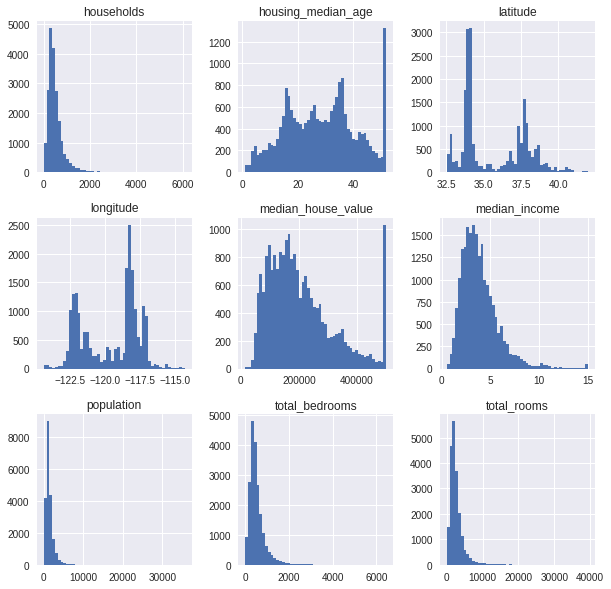

In [19]:
# Draw histogram charts for all variables, 50 bins (boxes), figsize (lenght , height).
histogram = housing.hist(bins=50, figsize=(10,10))


## Split data. Train and test data sets. 

In [0]:
## For version under 0.21 of Sklearn ALWAYS SET the test_size otherwise will set it to 0.1 

In [0]:
np.random.seed(42)

In [0]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [0]:
## For version under 0.21 of Sklearn ALWAYS SET the test_size otherwise will set it to 0.1 
split = sss(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [0]:
## dropping the labels from the new test and train sets
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    
## ALSO you have to drop the categorical values from the main dataset "housing"

# housing.drop("income_cat", axis= 1, inplace = True)

In [25]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [0]:
## ALSO you have to drop the categorical values from the main dataset "housing"

housing.drop("income_cat", axis = 1, inplace= True)

In [27]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [0]:
## WE SET THE TRAIN SET TO A NEW VARIABLE TO MAKE TRANSFORMATIONS, EXPERIMENT WITH ATTRIBUTES COMBINATIONS

## Always, add .copy() method when you asing a DataFrame to another variable or copy parts of it!!

train_df = strat_train_set.copy()

In [0]:
## Apply Geographical visualization techniques to import map and make a heatmap.

## Looking for correlations

In [0]:
# Calculating the standard correlation matrix, based on Pearson's r correlation using " corr()" method
# Realize correlations only show linear relations not complex relations

corr_matrix = train_df.corr()

In [31]:
corr_matrix ["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [0]:
# Try combine attributes resulting in newones that can be important in the estimation

In [33]:
# new colums were added, we need to assing the function again
# Results are differetn since we using ShuffleSplit instead of SSS
corr_matrix = train_df.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### For this example we use a copy of the original Strat Train Set without the new variables

In [0]:
# rooms per household, the rooms attribute was calculated for the district
train_df ["rooms_per_household"] = train_df["total_rooms"]/train_df["households"]

# bedrooms per rooms, the number of rooms in comparison of the number the bedrooms
train_df["bedrooms_per_room"] = train_df["total_bedrooms"]/train_df["total_rooms"]

# population_per_houddsehold.
train_df["population_per_household"] = train_df["population"]/train_df["households"]


In [0]:
## Separate the predictors and labels in two sets, we used the split dataset not the copy
housing_pred = strat_train_set.drop("median_house_value", axis= 1).copy()
housing_label = strat_train_set["median_house_value"].copy()

In [36]:
housing_pred.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN


In [37]:
housing_label.head(3)

17606    286600.0
18632    340600.0
14650    196900.0
Name: median_house_value, dtype: float64

### Handling missing values with scikitlearn

In [0]:
## we set housing_num as an example not as a df that we later use!!

In [0]:
from sklearn.preprocessing import Imputer

In [40]:
## types of strategies:  mean, median and most_frequent, type of strategies are an hyperparameter
imputer = Imputer(strategy= "median")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
## imputer only can be applied to numeric values, so drop the text attributes

In [0]:
housing_num = housing_pred.drop("ocean_proximity", axis = 1).copy()

## Alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [43]:
## The fit() method is an estimator, estimates a parameter from a dataset.
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [45]:
housing_num.median()
## Check that this is the same as manually computing the median of each attribute. For more clarity apply .tolist() method
## b = imputer.statistics_
## b.tolist()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [0]:
## The transformed dataset of variables, the output is a Numpy array

X = imputer.transform(housing_num).copy()

In [0]:
## Transform to a DF
X = pd.DataFrame(X, columns=housing_num.columns)

In [48]:
X.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621


In [0]:
## we set housing_num as an example not as a df that we later use!!


## Handling text and Categorical attributes

In [0]:
## we set housing_cat as an example not as a df that we later use!!

In [0]:
housing_cat = housing_pred["ocean_proximity"].copy()

In [52]:
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [0]:
## Encoding the categorical variables, future encoders custom package Install it from outside.
## One Hot encoder from sklearn will not support conversions of string values only numerical (:/) until version 0.20 

from sklearn.preprocessing import OneHotEncoder

In [0]:
encoder = OneHotEncoder()

In [0]:
## .reshape(-1,1) where -1 means unspecified for the length. 
housing_encode = encoder.fit_transform(housing_cat.values.reshape(-1,1))

In [56]:
housing_encode

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [57]:
## To see display it in dense not sparse
housing_encode.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [58]:
## Display categories from the encoding
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [0]:
## we set housing_cat as an example not as a df that we later use!!

###  Custom transformers

In [0]:
## Selector of classes, my version works on dataframes and outputs dataframes

In [0]:
## Get a list of the columns you need to include for each category, we create them form the original split without the labels
## housing_pred
num_attribs = list(housing_pred.select_dtypes(include= [np.number]))
cat_attribs = list((housing_pred.select_dtypes(include=[object])))

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [0]:
## Calculate and combine attributes

## Column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, bedrooms_per_room, population_per_household, rooms_per_household]

## Feature Scaling 

In [0]:
## mentioned 2 MinMax scaler, and StandardScaling


In [0]:
### http://scikit-learn.org/stable/modules/preprocessing.html
## StandarScaler()

from sklearn.preprocessing import StandardScaler

## Transformation Pipelines

In [65]:
housing_pred.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN


In [0]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [67]:
num_pipe = Pipeline([
            ("selector", DataFrameSelector(num_attribs)),
            ("imputer", Imputer(strategy= "median")),
            ("adder", CombinedAttributesAdder()),
            ("std_scaler", StandardScaler()),
])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
cat_pipe = Pipeline([
            ("selector", DataFrameSelector(cat_attribs)),
            ("one_hot", OneHotEncoder()),
])

In [0]:
## FeatureUnion will concatenate the resulting arrays!

full_pipe = FeatureUnion(transformer_list = [
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe),
])

In [0]:
## numpy array of data processed to be used in estimations

housing_prepared = full_pipe.fit_transform(housing_pred)

In [0]:
prepared_pandas= pd.DataFrame(housing_prepared.toarray())

In [72]:
prepared_pandas.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,0.155318,-0.086499,-0.312055,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,-0.836289,-0.033534,0.217683,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,0.422200,-0.092405,-0.465315,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.196453,0.089736,-0.079661,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,0.269928,-0.004194,-0.357834,1.0,0.0,0.0,0.0,0.0


## Select and train a model

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
## Ordinary least squares method
lin_reg = LinearRegression ()

In [0]:
s = time.time()

In [76]:
lin_reg.fit(housing_prepared, housing_label)

## once fit you will have 2 methods where the data was stored. " coef_ "  and " intercept_ "

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
f = time.time()
t = f-s
t 

5.383306980133057

In [78]:
lin_reg.coef_


array([-55650.41176637, -56716.4524339 ,  13732.83900574,  -1933.12762642,
         7330.04074471, -45708.26313908,  45455.47530404,  74714.39163015,
         9249.75908097,   1042.95590816,   6605.12819047,  11907.55244921,
       -25295.07573628, 140281.86024347,   7444.2366202 ,  15281.80946887])

### Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
tree_reg = DecisionTreeRegressor()

In [0]:
s1 = time.time()

In [82]:
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [83]:
f1 = time.time()
t1 = f1-s1
t1

7.044358968734741

### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
forest_reg = RandomForestRegressor()

In [0]:
s2 = time.time()

In [87]:
forest_reg.fit(housing_prepared,housing_label)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
f2 = time.time()
t2 = f2-s2
t2

16.985894441604614

# Evaluate the model

In [0]:
## Calculate the mean squared error, but notice We want the
## " Squared Root Mean Squared Error" (RMSE, also is the std dev or eclidean norm)
from sklearn.metrics import mean_squared_error

In [0]:
## Predict the labels based on the fit of training data on the training data
housing_predictions = lin_reg.predict(housing_prepared)

In [0]:
lin_mse = mean_squared_error (housing_label, housing_predictions)

In [92]:
## Calculating RMSE
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848925

### Evaluate Tree Regression

In [0]:
housing_predict_tree = tree_reg.predict(housing_prepared)

In [0]:
tree_mse = mean_squared_error(housing_label, housing_predict_tree)

In [95]:
## The result shows overfitting 
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Evaluate Forest Regression

In [0]:
forest_predicted = forest_reg.predict(housing_prepared)

In [0]:
forest_mse = mean_squared_error(housing_label, forest_predicted)

In [98]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22029.300236474035

# Better Evaluations using CV

In [0]:
## Train and test the data using the Train Dataset, get the RMSE
## Run the CV evaluation
## 

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
s3 = time.time()

In [0]:
## cross_val_score(estimator, X, y, scoring, cv)  

lin_reg_cv = cross_val_score(lin_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv= 10)

In [103]:
f3 = time.time()
t3 = f3-s3
t3

2.60886812210083

In [0]:
## sklearn expects a utility function but we are measuring the error rmse's 
## we have to calculate sqrt of the negative of the CV results
lin_rmse_scores = np.sqrt(-lin_reg_cv)

In [105]:
lin_rmse_scores

array([66782.73844188, 66960.11808939, 70347.9524409 , 74739.5705621 ,
       68031.13388145, 71193.84180591, 64969.63057636, 68281.61137881,
       71552.91569387, 67665.10081596])

In [0]:
## function to display the mean and std of the scores

def cv_scores(scores):
    print ("Mean Score: ", scores.mean())
    print ("Standard Dev: ", scores.std())

In [107]:
cv_scores(lin_rmse_scores)

Mean Score:  69052.46136866506
Standard Dev:  2731.6740067808373


### CV for tree 

In [0]:
s4 = time.time()

In [0]:
tree_reg_cv = cross_val_score(tree_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv= 10)

In [110]:
f4 = time.time()
t4 = f4-s4
t4

17.805492401123047

In [0]:
tree_rmse_scores = np.sqrt(-tree_reg_cv)

In [112]:
cv_scores(tree_rmse_scores)

Mean Score:  70773.57107775514
Standard Dev:  2601.595040504883


### CV for forest

In [0]:
s5 = time.time()

In [0]:
forest_reg_cv = cross_val_score(forest_reg, housing_prepared, housing_label, scoring ="neg_mean_squared_error", cv= 10)

In [115]:
f5 = time.time()
t5 = f5-s5
t5

94.48191714286804

In [0]:
### 

In [0]:
forest_cv_scores = np.sqrt(-forest_reg_cv)

In [118]:
cv_scores(forest_cv_scores)

Mean Score:  52890.70518145795
Standard Dev:  1851.5814614213064


### Save your trained model using joblib or pickle

In [0]:
## How to save and load model jupyter notebooks 

## Fine Tunning the model

## <font color=green> Grid search for fine tunning </font>

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
## Select the hyperparameters you want to tune. In the form of a dictionary

In [0]:
## A list of two dictionaries, 
## 1st one with 3*4 = 12 combinations, and bootstraping set True by default.
## 2nd one with 2*3 = 6 

param_grid = [

{"n_estimators":  [3,10,30], "max_features": [2,4,6,8]},

{"bootstrap": [False] , "n_estimators": [3,10], "max_features": [2,3,4]}
    
]

## This will run 18 different combinations

In [0]:
# Set the method again
forest_reg = RandomForestRegressor()

In [0]:
s6 = time.time()

In [0]:
## The search will perfrom CV with the data, so will get CV iterations of all combinations, 18 *5 = 90
## Also, when the best hyperparameters are found, will fit the data on the whole dataset with them
## refit, can also be a string and add additional scoring method, the best param won't be found since we have 2 scoring methods
grid_search = GridSearchCV (forest_reg, param_grid, scoring="neg_mean_squared_error", cv = 5)

In [126]:
f6 = time.time()
t6 = f6-s6
t6

2.8822500705718994

In [0]:
s7 = time.time()

In [128]:
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [129]:
f7 = time.time()
t7 = f7-s7
t7

324.1061816215515

In [130]:
"http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html"
## multimetric evaluation, with refit

'http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'

In [131]:
## To display the results of combinations of hyperparameters

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

64413.375831461286 {'max_features': 2, 'n_estimators': 3}
56257.87515277212 {'max_features': 2, 'n_estimators': 10}
52457.295172850594 {'max_features': 2, 'n_estimators': 30}
61080.97943025133 {'max_features': 4, 'n_estimators': 3}
52589.52910691473 {'max_features': 4, 'n_estimators': 10}
50487.99212327775 {'max_features': 4, 'n_estimators': 30}
58896.779304852455 {'max_features': 6, 'n_estimators': 3}
52360.95841091854 {'max_features': 6, 'n_estimators': 10}
49851.922752986175 {'max_features': 6, 'n_estimators': 30}
58905.539434333696 {'max_features': 8, 'n_estimators': 3}
52105.39229193628 {'max_features': 8, 'n_estimators': 10}
49992.91987113627 {'max_features': 8, 'n_estimators': 30}
62121.4158489341 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54563.078109748116 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60664.843253728664 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51932.2775204953 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [132]:
## The best hyperparameters found
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

## <font color=red> Random Search for fine tunning </font>

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
forest_reg = RandomForestRegressor()

In [0]:
from scipy.stats import randint

## Use from scipy.stats import uniform as sp_rand
## will create a generator that outputs numbers between 0 and 1
## {alpha: sp_rand()} 

In [0]:
## Use scipy random to get a generator of integers

param_distribs = {
'n_estimators': randint(low=1, high=200),
'max_features': randint(low=1, high=8),
}

In [0]:
s8 = time.time()

In [0]:
## add random state to equalize results
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, 
                                   scoring='neg_mean_squared_error')

In [139]:
random_search.fit(housing_prepared, housing_label)

KeyboardInterrupt: ignored

In [134]:
f8 = time.time()
t8 = f8-s8
t8

815.0396935939789

In [135]:
## display the results of combinations of hyperparameters
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49631.70843611006 {'max_features': 5, 'n_estimators': 70}
54601.48969878407 {'max_features': 1, 'n_estimators': 133}
58126.6712219178 {'max_features': 1, 'n_estimators': 12}
52306.58333818515 {'max_features': 2, 'n_estimators': 46}
51793.087071229784 {'max_features': 2, 'n_estimators': 177}
49710.82628846082 {'max_features': 6, 'n_estimators': 45}
50466.22489692969 {'max_features': 3, 'n_estimators': 73}
52358.64508764104 {'max_features': 2, 'n_estimators': 47}
54780.63230326728 {'max_features': 1, 'n_estimators': 56}
49308.34018132685 {'max_features': 6, 'n_estimators': 107}


In [136]:
## Display the importance of the features (for random forest), also can perform with random_search
## only display an array with the values in order the numpy array was fed

feature_importances = random_search.best_estimator_.feature_importances_
feature_importances

array([7.76417630e-02, 7.00002537e-02, 4.23216693e-02, 1.81627663e-02,
       1.73327214e-02, 1.83185748e-02, 1.64234860e-02, 3.29255413e-01,
       7.08547267e-02, 1.07244857e-01, 6.30655419e-02, 1.53736443e-02,
       1.45534698e-01, 8.25873148e-05, 3.28087913e-03, 5.10641778e-03])

## Evaluate your model in the test set

In [0]:
## store the best estimator (that includes the hyperparameters) found

final_model = grid_search.best_estimator_

In [0]:
## Separate the data from the labels from your test set

X_test = strat_test_set.drop("median_house_value", axis= 1)
y_test = strat_test_set["median_house_value"]

In [0]:
## Apply the pipeline to the data, but only transform it, DON'T FIT the data 
X_test_prepared  = full_pipe.transform(X_test)

In [0]:
final_predictions = final_model.predict(X_test_prepared)

In [141]:
## Measure the error

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47844.79237680643

In [142]:
fin = time.time()
total_tiempo = fin - start_time
total_tiempo

1572.014610528946

### Calculate the 95% confidence interval

In [0]:
from scipy import stats

In [144]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45839.84775104, 49769.03327694])

### If we would like to calculate the z-scores

In [145]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45840.44861253827, 49768.47984578862)

In [1]:
print ("Linear Regression:{}".format(t))
print ("Decision Tree Reg:{}".format(t1))
print ("Random Forest:{}".format(t2))
print ("Cross Val Linear Regression:{}".format(t3))
print ("Cross Val Decision Tree Reg:{}".format(t4))
print ("Cross Val Random Forest:{}".format(t5))
print ("Grid Search Random Forest:{}".format(t7))
print ("Random Search Random Forest:{}".format(t8))

NameError: ignored